# Introduction to Bioinformatics

## 04 - Pyhlogenetic trees

In the third practice session, we learned how to write a Python function that generated multiple sequence alignment (MSA) objects in BioPython's format. These MSA objects are the entry point for most of the methods of evolutionary sequence comparison.

This practical session will explore how to generate phylogenetic trees for comparing our sequences. 

This notebook assumes that you have all the programs installed. If you have not installed them yet, please refer to the preparation instructions that appear in the README.md file in the practical session 04 GitHub's page.

### Introduction

Phylogenetic trees try to capture the realistic aspects of genomic sequence evolution. They are particular representations that, in molecular biology, depict the evolutionary relationships between a set of homologous sequences based upon similarities and differences in their physical or genetic characteristics. Trees are a type of data structure with a tree design with a group of connected nodes. 

Some definitions are essential to work with trees (extracted from [http://etetoolkit.org](http://etetoolkit.org/docs/latest/tutorial/tutorial_trees.html#treess)):

- A node with a child is called the child's parent node (or ancestor node, or superior). 
- A node has at most one parent.


- The topmost node in a tree is called the root node.
- The root node has no parents.
- All other nodes can be reached from it by following edges or links.


- The height of a node is the length of the longest downward path to a leaf from that node. 
- The height of the root is the height of the tree.
- The depth of a node is the length of the path to its root (i.e., its root path).


- Nodes at the bottommost level of the tree are called leaf nodes.
- Leaf nodes do not have any children.
- An internal node or inner node is any node of a tree with child nodes and is thus not a leaf node.


- A subtree is a portion of a tree data structure that can be viewed as a complete tree in itself.
- Any node in a tree T, together with all the nodes below it, comprise a subtree of T. 

In bioinformatics, trees are the result of many analyses, such as phylogenetics or clustering. ETE is a python toolkit that assists in the automated manipulation, analysis, and visualization of any hierarchical trees. It provides general methods to handle and visualize tree topologies and specific modules to deal with phylogenetic and clustering trees.

### Building a Phylogenetic Tree from a multiple sequence fasta file

We will use the command-line and Python Application Programming Interface (API) of the ETE library to work with Tree constructions and visualizations, respectively.

We will use as an example our previous 20 cluster-center sequences for the 2-hydroxymuconate tautomerase enzyme. The ETE command line program has workflows for all the steps in constructing a Phylogenetic Tree from a fasta file. We start from an unaligned fasta file containing our sequences (in the input directory). We execute:

```ete3 build -w standard_raxml -a input/2HDXMT_clusters.fasta -o output_tree```

### Accessing Tree information with the Python library ete3

The previous command created a directory called output_tree, in which it saved all the output produced by the tree construction. We can now import particular objects from the ete3 library to start accessing the tree data: 

In [1]:
from ete3 import Tree, TreeStyle, TextFace, NodeStyle

We will parse the calculated phylogenetic tree data from a [Newick-format](https://en.wikipedia.org/wiki/Newick_format#:~:text=In%20mathematics%2C%20Newick%20tree%20format,Maddison%2C%20Christopher%20Meacham%2C%20F.) file. First, we print the content of this file:

In [2]:
tree_file = 'output_tree/clustalo_default-none-none-raxml_default/2HDXMT_clusters.fasta.final_tree.nw'

#  The output is stored in one line
with open(tree_file) as tf:
    for l in tf:
        print(l)
        print()

((tr|A0A135L6Q7|A0A135L6Q7_9BACI:0.312762,(tr|A0A433XHH6|A0A433XHH6_9BACL:0.401235,tr|A0A562QMX2|A0A562QMX2_9BACI:0.159336)0.99:0.433804)0.94:0.110903,(tr|A0A1E5G4W6|A0A1E5G4W6_9BACL:0.290158,((tr|U5S6W5|U5S6W5_9LACT:0.148852,tr|A0A430B1P6|A0A430B1P6_9ENTE:0.522781)0.93:0.264742,(tr|K6BVQ0|K6BVQ0_BACAZ:0.409281,((tr|A0A5R8QHJ7|A0A5R8QHJ7_9FIRM:0.295199,(tr|I7ZFL3|I7ZFL3_9GAMM:0.558207,tr|J7J0V0|J7J0V0_DESMD:0.304998)0.61:0.0837698)0.79:0.106109,(((tr|A0A553ZU89|A0A553ZU89_9BACI:0.405443,tr|Q5WB24|Q5WB24_BACSK:0.160382)0.16:0.0334888,(tr|V6Q3X3|V6Q3X3_9ENTE:0.282468,tr|A0A075LPZ2|A0A075LPZ2_9BACI:0.267529)0.84:0.118828)0.85:0.0911703,(sp|P70994|4OT_BACSU:0.213266,(tr|W4F440|W4F440_9BACL:0.280424,((sp|Q4L670|Y1546_STAHJ:0.338575,tr|A0A2X3G370|A0A2X3G370_9LIST:0.256892)0.74:0.0313725,(tr|A0A4R6BYV0|A0A4R6BYV0_9STAP:0.304749,tr|A0A4D7CVZ2|A0A4D7CVZ2_9ENTE:0.144843)0.9:0.123954)0.85:0.0940497)0.83:0.080128)0.77:0.0525805)0.81:0.0752428)0.5:0.0848564)0.14:0.0605519)0.8:0.0676026)0.94:0.11090

We observe that the tree nodes are positioned inside different parentheses with the node names and the edge distances. It is better to load this information into the ETE library's Python API to help us build more valuable visualizations from this data. 

We start by loading the same file as a Tree object within the ete3 Python library:

In [3]:
# Load a tree structure from a newick file.
t = Tree(tree_file)
print(t)


      /-tr|A0A135L6Q7|A0A135L6Q7_9BACI
   /-|
  |  |   /-tr|A0A433XHH6|A0A433XHH6_9BACL
  |   \-|
  |      \-tr|A0A562QMX2|A0A562QMX2_9BACI
--|
  |   /-tr|A0A1E5G4W6|A0A1E5G4W6_9BACL
  |  |
  |  |      /-tr|U5S6W5|U5S6W5_9LACT
   \-|   /-|
     |  |   \-tr|A0A430B1P6|A0A430B1P6_9ENTE
     |  |
      \-|   /-tr|K6BVQ0|K6BVQ0_BACAZ
        |  |
        |  |      /-tr|A0A5R8QHJ7|A0A5R8QHJ7_9FIRM
        |  |   /-|
         \-|  |  |   /-tr|I7ZFL3|I7ZFL3_9GAMM
           |  |   \-|
           |  |      \-tr|J7J0V0|J7J0V0_DESMD
           |  |
            \-|         /-tr|A0A553ZU89|A0A553ZU89_9BACI
              |      /-|
              |     |   \-tr|Q5WB24|Q5WB24_BACSK
              |   /-|
              |  |  |   /-tr|V6Q3X3|V6Q3X3_9ENTE
              |  |   \-|
               \-|      \-tr|A0A075LPZ2|A0A075LPZ2_9BACI
                 |
                 |   /-sp|P70994|4OT_BACSU
                 |  |
                  \-|   /-tr|W4F440|W4F440_9BACL
                    |  |
            

When we call print upon the Tree object, it displays an ASCII cartoon of how our Tree looks. However, the ASCII visualization does not show the correct edge distances from each tree node. 

We can see the documentation of the Tree() function output to know more about the methods and attributes inside it:

In [4]:
print(type(t))
help(t)

<class 'ete3.coretype.tree.TreeNode'>
Help on TreeNode in module ete3.coretype.tree object:

class TreeNode(builtins.object)
 |  TreeNode (Tree) class is used to store a tree structure. A tree
 |  consists of a collection of TreeNode instances connected in a
 |  hierarchical way. Trees can be loaded from the New Hampshire Newick
 |  format (newick).
 |  
 |  :argument newick: Path to the file containing the tree or, alternatively,
 |     the text string containing the same information.
 |  
 |  :argument 0 format: subnewick format
 |  
 |    .. table::
 |  
 |        ======  ==============================================
 |        FORMAT  DESCRIPTION
 |        ======  ==============================================
 |        0        flexible with support values
 |        1        flexible with internal node names
 |        2        all branches + leaf names + internal supports
 |        3        all branches + all names
 |        4        leaf branches + leaf names
 |        5        i

The TreeNode object is the output of the function that parses the Newick format file. This object is how the ETE library represents trees and their information. We can access all the tree information from this object. For example, we can select a specif leaf node in the tree:

In [5]:
# We can select specific nodes by name
A = t.search_nodes(name="tr|A0A135L6Q7|A0A135L6Q7_9BACI")[0]
print(type(A))
print(A)

<class 'ete3.coretype.tree.TreeNode'>

--tr|A0A135L6Q7|A0A135L6Q7_9BACI


Note that each node in the TreeNode (even leaves) is also a TreeNode instance. This choice entails the fact that each node can be treated as a subtree of our tree. The TreeNode method can be iterated to access all the leaves in it:

In [6]:
# Iterate leafs inside the tree
for l in t:
    print(l)
    print(l.name)
    print()


--tr|A0A135L6Q7|A0A135L6Q7_9BACI
tr|A0A135L6Q7|A0A135L6Q7_9BACI


--tr|A0A433XHH6|A0A433XHH6_9BACL
tr|A0A433XHH6|A0A433XHH6_9BACL


--tr|A0A562QMX2|A0A562QMX2_9BACI
tr|A0A562QMX2|A0A562QMX2_9BACI


--tr|A0A1E5G4W6|A0A1E5G4W6_9BACL
tr|A0A1E5G4W6|A0A1E5G4W6_9BACL


--tr|U5S6W5|U5S6W5_9LACT
tr|U5S6W5|U5S6W5_9LACT


--tr|A0A430B1P6|A0A430B1P6_9ENTE
tr|A0A430B1P6|A0A430B1P6_9ENTE


--tr|K6BVQ0|K6BVQ0_BACAZ
tr|K6BVQ0|K6BVQ0_BACAZ


--tr|A0A5R8QHJ7|A0A5R8QHJ7_9FIRM
tr|A0A5R8QHJ7|A0A5R8QHJ7_9FIRM


--tr|I7ZFL3|I7ZFL3_9GAMM
tr|I7ZFL3|I7ZFL3_9GAMM


--tr|J7J0V0|J7J0V0_DESMD
tr|J7J0V0|J7J0V0_DESMD


--tr|A0A553ZU89|A0A553ZU89_9BACI
tr|A0A553ZU89|A0A553ZU89_9BACI


--tr|Q5WB24|Q5WB24_BACSK
tr|Q5WB24|Q5WB24_BACSK


--tr|V6Q3X3|V6Q3X3_9ENTE
tr|V6Q3X3|V6Q3X3_9ENTE


--tr|A0A075LPZ2|A0A075LPZ2_9BACI
tr|A0A075LPZ2|A0A075LPZ2_9BACI


--sp|P70994|4OT_BACSU
sp|P70994|4OT_BACSU


--tr|W4F440|W4F440_9BACL
tr|W4F440|W4F440_9BACL


--sp|Q4L670|Y1546_STAHJ
sp|Q4L670|Y1546_STAHJ


--tr|A0A2X3G370|A0A2X3G370_9L

The names of the leaves are the first part of the descriptions in our fasta file. We can change this from directly in the TreeNode objects representing each leaf. Let's rename each leaf node name to the UniProt ID only:

In [7]:
# The default Tree() object iteration is by leafs.
t = Tree(tree_file)
for x in t:
    x.name = x.name.split('|')[1] # Change the name attribute value to the UniProt ID
print(t)


      /-A0A135L6Q7
   /-|
  |  |   /-A0A433XHH6
  |   \-|
  |      \-A0A562QMX2
--|
  |   /-A0A1E5G4W6
  |  |
  |  |      /-U5S6W5
   \-|   /-|
     |  |   \-A0A430B1P6
     |  |
      \-|   /-K6BVQ0
        |  |
        |  |      /-A0A5R8QHJ7
        |  |   /-|
         \-|  |  |   /-I7ZFL3
           |  |   \-|
           |  |      \-J7J0V0
           |  |
            \-|         /-A0A553ZU89
              |      /-|
              |     |   \-Q5WB24
              |   /-|
              |  |  |   /-V6Q3X3
              |  |   \-|
               \-|      \-A0A075LPZ2
                 |
                 |   /-P70994
                 |  |
                  \-|   /-W4F440
                    |  |
                     \-|      /-Q4L670
                       |   /-|
                       |  |   \-A0A2X3G370
                        \-|
                          |   /-A0A4R6BYV0
                           \-|
                              \-A0A4D7CVZ2


We see now that the displayed names correspond correctly to the UniProt IDs of our sequences.

### Visulizying phylogenetic trees with Python

We can create alternative visualizations for our tree depending on our needs. The ETE library offers several ways of displaying trees. Let us try a few of them. 

Most visualizations will be rendered as image files (they can be written into PNG, PDF, and SVG formats), so we import the Image function from our notebook to display them directly in our Jupyter Notebooks.

In [8]:
from IPython.display import Image

Before generating the images of our alternative tree visualizations, we create a folder called "images" to store them all. For that, we import the os library, which has methods for creating system folders:

In [9]:
import os

In [10]:
# Create a folder called "images" if it does not exists
if not os.path.exists('images'):
    os.mkdir('images')

We start with a circular display of our tree. The code below has some commented options that affect how the tree visualization changes. Feel free to uncomment and change them to see how they affect the tree display.

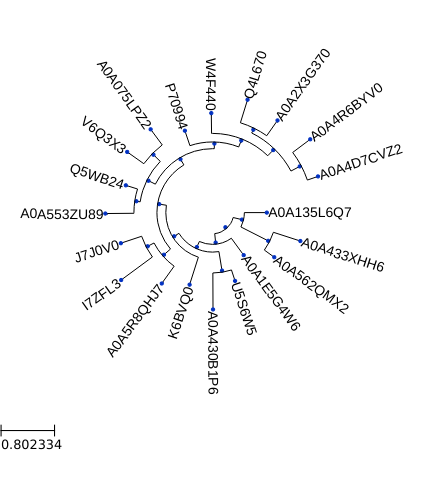

In [11]:
# Display the Tree in a circular style
circular_style = TreeStyle()
circular_style.mode = "c" # draw tree in circular mode

# Options | Uncomment to see their effect

# circular_style.scale = 20
# circular_style.arc_start = 180 # 0 degrees = 3 o'clock
# circular_style.arc_span = 180
# circular_style.title.add_face(TextFace("2-hydroxymuconate tautomerase enzyme Tree", fsize=10), column=0)

td = t.render("images/mytree_cs.png", w=120, units="mm", tree_style=circular_style)
Image('images/mytree_cs.png')

Now we try the standard tree layout style. 

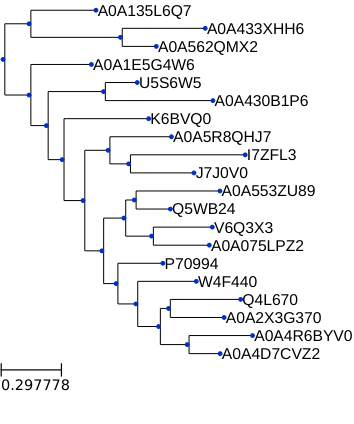

In [12]:
# Display the Tree in a standard tree style
ts = TreeStyle()

# Options | Uncomment to see their effect

# ts.show_leaf_name = True # Names of the leafs
# ts.show_branch_length = True
# ts.show_branch_support = True
# ts.scale = 100 # Zoom in the Y-axis
# ts.rotation = 90
# ts.title.add_face(TextFace("2-hydroxymuconate tautomerase enzyme Tree", fsize=10), column=0)

td = t.render("images/mytree_ts.png", w=100, units="mm", tree_style=ts)
Image('images/mytree_ts.png')

We can also change the way the objects representing the tree appear in the tree visualization:

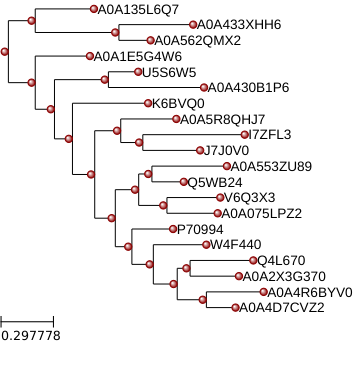

In [13]:
# Load and change name to leafs.
t = Tree(tree_file)
for x in t:
    x.name = x.name.split('|')[1] # Change the name attribute value
    
# Draws nodes as small red spheres of diameter equal to 7 pixels
nstyle = NodeStyle()
nstyle["shape"] = "sphere"
nstyle["size"] = 7
nstyle["fgcolor"] = "darkred"

# Gray dashed branch lines
# nstyle["hz_line_type"] = 1
# nstyle["hz_line_color"] = "#cccccc"

# Applies the same static style to all nodes in the tree. Note that,
# if "nstyle" is modified, changes will affect to all nodes
for n in t.traverse():
    n.set_style(nstyle)
    
# for n in t:
#     n.set_style(nstyle)
    
# Display the Tree in a standard tree style
td = t.render("images/mytree_ts_rn.png", w=100, units="mm", tree_style=ts)
Image('images/mytree_ts_rn.png')

Finally, we explore how to change the background of selected nodes.

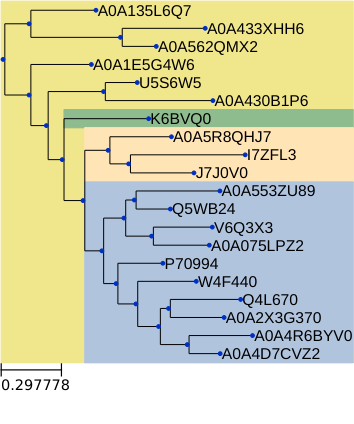

In [14]:
# Load and change name to leafs.
t = Tree(tree_file)
for x in t:
    x.name = x.name.split('|')[1] # Change the name attribute value
    
# Define specific nodes
nst1 = NodeStyle()
nst1["bgcolor"] = "LightSteelBlue"
nst2 = NodeStyle()
nst2["bgcolor"] = "Moccasin"
nst3 = NodeStyle()
nst3["bgcolor"] = "DarkSeaGreen"
nst4 = NodeStyle()
nst4["bgcolor"] = "Khaki"

# Change background color to specific node
n1 = t.get_common_ancestor("P70994", "A0A553ZU89")
n1.set_style(nst1)

n2 = t.get_common_ancestor("J7J0V0", "A0A5R8QHJ7")
n2.set_style(nst2)

n3 = t.get_leaves_by_name('K6BVQ0')[0]
n3.set_style(nst3)

n4 = t.get_common_ancestor("A0A135L6Q7", "A0A430B1P6")
n4.set_style(nst4)

td = t.render("images/mytree_ts_bgc.png", w=100, units="mm", tree_style=ts)
Image('images/mytree_ts_bgc.png')

### Displaying MSA information beside the phylogenetic tree


We can visualize MSA information together with our tree display. The MSA provides more detailed information to depict domain composition, sequence alignment, or any other information relevant to contrast with the evolutionary relationship among our homologous sequences. 

Here we load the phylogenetic tree file with a different class called PhyloTree. This class supports the linkage of multiple sequence alignment for straightforward depiction. 

In [15]:
from ete3 import PhyloTree

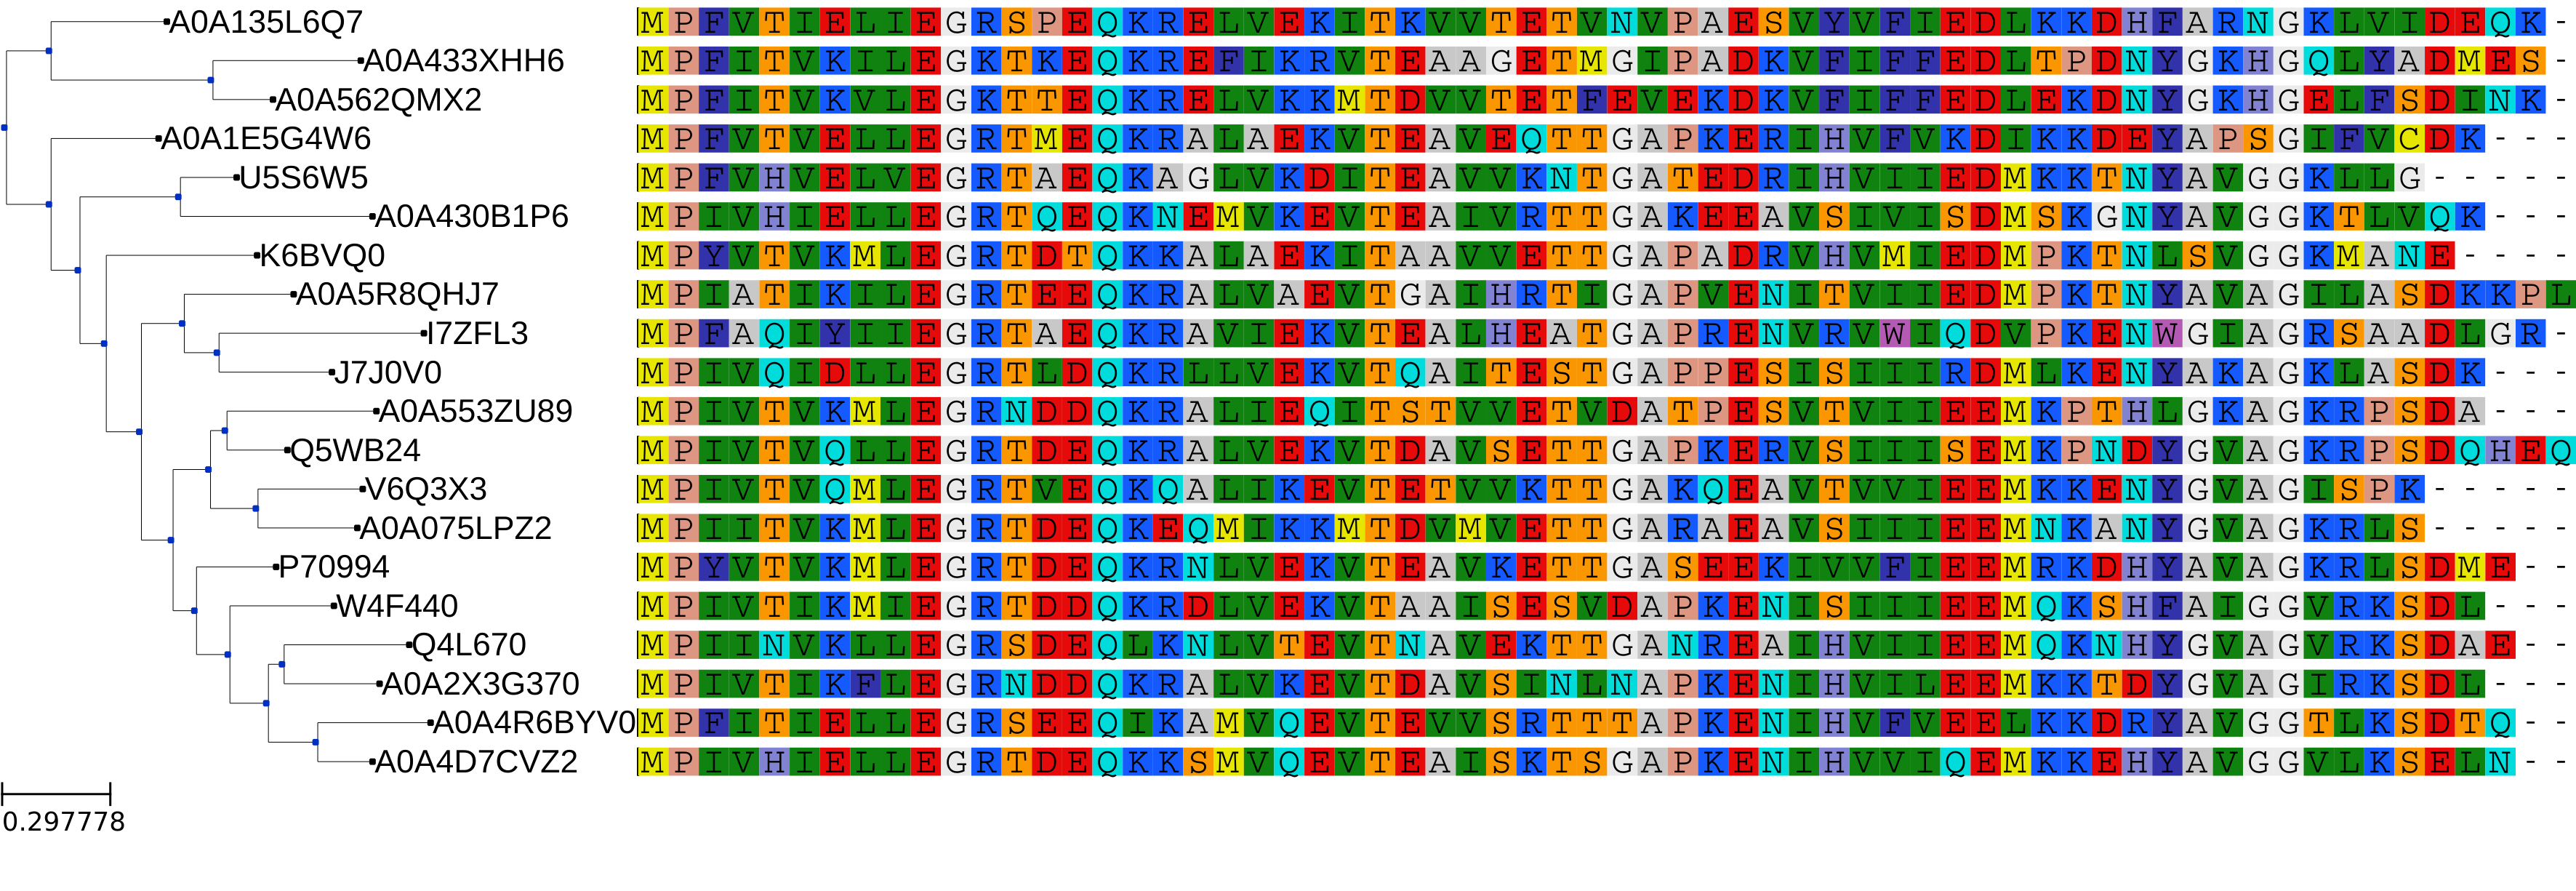

In [16]:
# Define the path to the MSA file
alignment_file = 'output_tree/clustalo_default-none-none-raxml_default/2HDXMT_clusters.fasta.final_tree.used_alg.fa'

# Load the newick format tree file
t = PhyloTree(tree_file)

# Link the msa file to the PhyloNode object
t.link_to_alignment(alignment=alignment_file, alg_format="fasta")

# We change the name of the nodes to the UniProt IDs.
for x in t:
    x.name = x.name.split('|')[1] # Change the name attribute value

# Then we render and display the tree image.
td = t.render("images/mytree_ts_fasta.png", w=1000, units="mm")
Image('images/mytree_ts_fasta.png')

### Working with phylogenetic lineages

Often, we need to relate the distances and groupings in the evolutionary tree to taxonomical lineages. The NCBI database has this information in a taxonomical database to access the ETE library directly. However, first, we need to get the species' names for each protein sequence. For this session, we have created a small script (uniprot.py) that contains a function (getOrganism) that retrieves the name of the organism from the UniProt webpage (so you'll need an internet connection). The function depends on the scrapy library, so we should install it before running this function.

We import this function and create a dictionary relating the UniProt IDs to the species names:

In [17]:
from uniprot import getOrganism

Now we can annotate the tree using the above function:

In [18]:
# Collect the list with all the species names for later
species = {}

# Iterate each leaf and print the node name and the name from the species by calling leaf attributes
for n in t.get_leaves():

    # Append the species name to the list
    species[n.name] = getOrganism(n.name)
    
print(species)

{'A0A135L6Q7': 'Tepidibacillus decaturensis', 'A0A433XHH6': 'Paenibacillus sp. 3-5-3', 'A0A562QMX2': 'Alkalihalobacillus nanhaiisediminis', 'A0A1E5G4W6': 'Desulfuribacillus alkaliarsenatis', 'U5S6W5': 'Carnobacterium inhibens subsp. gilichinskyi', 'A0A430B1P6': 'Vagococcus carniphilus', 'K6BVQ0': 'Bacillus azotoformans LMG 9581', 'A0A5R8QHJ7': 'Firmicutes bacterium CS-1', 'I7ZFL3': 'Hydrocarboniphaga effusa AP103', 'J7J0V0': 'Desulfosporosinus meridiei (strain ATCC BAA-275 / DSM 13257 / NCIMB 13706 / S10)', 'A0A553ZU89': 'Bacillus sp. P16(2019)', 'Q5WB24': 'Bacillus clausii (strain KSM-K16)', 'V6Q3X3': 'Vagococcus lutrae LBD1', 'A0A075LPZ2': 'Terribacillus goriensis', 'P70994': 'Bacillus subtilis (strain 168)', 'W4F440': 'Viridibacillus arenosi FSL R5-213', 'Q4L670': 'Staphylococcus haemolyticus (strain JCSC1435)', 'A0A2X3G370': 'Listeria fleischmannii subsp. fleischmannii', 'A0A4R6BYV0': 'Macrococcus lamae', 'A0A4D7CVZ2': 'Vagococcus sp. MN-17'}


We notice that the species' names are not in the standard binomial nomenclature (genus + specific epithet). Therefore we need to change them by grabbing only the first two words for each entry.

In [19]:
# Print last iteration species
print(species[n.name])
# Print last iteration species splitted
print(species[n.name].split())
# Print last iteration species splitted two first items
print(species[n.name].split()[:2])
# Print last iteration species splitted two first items joined by a space character
print(' '.join(species[n.name].split()[:2]))

Vagococcus sp. MN-17
['Vagococcus', 'sp.', 'MN-17']
['Vagococcus', 'sp.']
Vagococcus sp.


In [20]:
# Replace each value by only the two first words of the same value
for s in species:
    species[s] = ' '.join(species[s].split()[:2])
print(species)

{'A0A135L6Q7': 'Tepidibacillus decaturensis', 'A0A433XHH6': 'Paenibacillus sp.', 'A0A562QMX2': 'Alkalihalobacillus nanhaiisediminis', 'A0A1E5G4W6': 'Desulfuribacillus alkaliarsenatis', 'U5S6W5': 'Carnobacterium inhibens', 'A0A430B1P6': 'Vagococcus carniphilus', 'K6BVQ0': 'Bacillus azotoformans', 'A0A5R8QHJ7': 'Firmicutes bacterium', 'I7ZFL3': 'Hydrocarboniphaga effusa', 'J7J0V0': 'Desulfosporosinus meridiei', 'A0A553ZU89': 'Bacillus sp.', 'Q5WB24': 'Bacillus clausii', 'V6Q3X3': 'Vagococcus lutrae', 'A0A075LPZ2': 'Terribacillus goriensis', 'P70994': 'Bacillus subtilis', 'W4F440': 'Viridibacillus arenosi', 'Q4L670': 'Staphylococcus haemolyticus', 'A0A2X3G370': 'Listeria fleischmannii', 'A0A4R6BYV0': 'Macrococcus lamae', 'A0A4D7CVZ2': 'Vagococcus sp.'}


Now that we have the species names for each of our proteins, we can get the NCBI taxonomic database data. ete3 has a particular class to do this. If this is the first time the class is used, it takes a while to load it since it needs to get all the data from the NCBI database first.

We import this class and wait until it finishes to load all the data:

In [21]:
from ete3 import NCBITaxa

The first thing we need to do is to create a dictionary mapping our species names to the taxonomic IDs of the NCBI taxonomic database:

In [22]:
ncbi = NCBITaxa()
name2taxid = ncbi.get_name_translator([*species.values()])

In [23]:
for k,v in name2taxid.items():
    print(k,v)

Alkalihalobacillus nanhaiisediminis [688079]
Bacillus subtilis [1423]
Carnobacterium inhibens [147709]
Desulfosporosinus meridiei [79209]
Desulfuribacillus alkaliarsenatis [766136]
Firmicutes bacterium [1879010]
Hydrocarboniphaga effusa [243629]
Listeria fleischmannii [1069827]
Macrococcus lamae [198484]
Paenibacillus sp. [58172]
Staphylococcus haemolyticus [1283]
Tepidibacillus decaturensis [1413211]
Terribacillus goriensis [386490]
Vagococcus carniphilus [218144]
Vagococcus lutrae [81947]
Vagococcus sp. [1933889]
Viridibacillus arenosi [263476]
Bacillus azotoformans [1454]
Bacillus clausii [79880]
Bacillus sp. [1409]


We can use this dictionary to name each node with its corresponding taxonomic ID. Let us define a function to do that:

In [24]:
# This function is employed to assign a name to each tree leaf
def get_species_taxid(node_name):
    
    # Get the name of the species using the global species dictionary
    sp_name = species[node_name]
    
    # Get the taxid of the species using the global name2taxid dictionary
    taxid = name2taxid[sp_name][0]
    
    return taxid

We create a new tree with the PhyloTree class into which we also put the MSA information. We then change the node names to the taxid using our previous function.

In [25]:
# Create new tree form the newick file
t2 = PhyloTree(tree_file)

# Give the tree the multiple alignment information
t2.link_to_alignment(alignment=alignment_file, alg_format="fasta")

# Iterate each leave and change the node name to its NCBI taxonomic ID
for n in t2.get_leaves():
    n.name = get_species_taxid(n.name.split('|')[1])
    
# Print the tree to observe the node names
print(t2)


      /-1413211
   /-|
  |  |   /-58172
  |   \-|
  |      \-688079
--|
  |   /-766136
  |  |
  |  |      /-147709
   \-|   /-|
     |  |   \-218144
     |  |
      \-|   /-1454
        |  |
        |  |      /-1879010
        |  |   /-|
         \-|  |  |   /-243629
           |  |   \-|
           |  |      \-79209
           |  |
            \-|         /-1409
              |      /-|
              |     |   \-79880
              |   /-|
              |  |  |   /-81947
              |  |   \-|
               \-|      \-386490
                 |
                 |   /-1423
                 |  |
                  \-|   /-263476
                    |  |
                     \-|      /-1283
                       |   /-|
                       |  |   \-1069827
                        \-|
                          |   /-198484
                           \-|
                              \-1933889


The PhyloNode object has a unique method to feed complete phylogenetic information to the tree "annotate_tree." It takes as an argument the tree and creates as outputs dictionaries for accessing name, lineages, and rank phylogenetic data.

In [26]:
tax2names, tax2lineages, tax2rank = ncbi.annotate_tree(t2)

In [27]:
print(tax2names)

{1283: 'Staphylococcus haemolyticus', 1409: 'Bacillus sp. (in: Bacteria)', 1423: 'Bacillus subtilis', 1454: 'Calidifontibacillus azotoformans', 58172: 'Paenibacillus sp.', 79209: 'Desulfosporosinus meridiei', 79880: 'Alkalihalobacillus clausii', 81947: 'Vagococcus lutrae', 147709: 'Carnobacterium inhibens', 198484: 'Macrococcus lamae', 218144: 'Vagococcus carniphilus', 243629: 'Hydrocarboniphaga effusa', 263476: 'Viridibacillus arenosi', 386490: 'Terribacillus goriensis', 688079: 'Alkalihalobacillus nanhaiisediminis', 766136: 'Desulfuribacillus alkaliarsenatis', 1069827: 'Listeria fleischmannii', 1413211: 'Tepidibacillus decaturensis', 1879010: 'Firmicutes bacterium', 1933889: 'Vagococcus sp.', 1: 'root', 2: 'Bacteria', 1224: 'Proteobacteria', 1236: 'Gammaproteobacteria', 1239: 'Firmicutes', 1279: 'Staphylococcus', 1385: 'Bacillales', 1386: 'Bacillus', 1637: 'Listeria', 2737: 'Vagococcus', 2747: 'Carnobacterium', 44249: 'Paenibacillus', 69965: 'Macrococcus', 79206: 'Desulfosporosinus',

In [28]:
print(tax2lineages)

{1283: [1, 131567, 2, 1783272, 1239, 91061, 1385, 90964, 1279, 1283], 1409: [1, 131567, 2, 1783272, 1239, 91061, 1385, 186817, 1386, 185979, 1409], 1423: [1, 131567, 2, 1783272, 1239, 91061, 1385, 186817, 1386, 653685, 1423], 1454: [1, 131567, 2, 1783272, 1239, 91061, 1385, 186817, 2792299, 1454], 58172: [1, 131567, 2, 1783272, 1239, 91061, 1385, 186822, 44249, 185978, 58172], 79209: [1, 131567, 2, 1783272, 1239, 186801, 186802, 186807, 79206, 79209], 79880: [1, 131567, 2, 1783272, 1239, 91061, 1385, 186817, 2675234, 79880], 81947: [1, 131567, 2, 1783272, 1239, 91061, 186826, 81852, 2737, 81947], 147709: [1, 131567, 2, 1783272, 1239, 91061, 186826, 186828, 2747, 147709], 198484: [1, 131567, 2, 1783272, 1239, 91061, 1385, 90964, 69965, 198484], 218144: [1, 131567, 2, 1783272, 1239, 91061, 186826, 81852, 2737, 218144], 243629: [1, 131567, 2, 1224, 1236, 1775403, 568386, 243627, 243629], 263476: [1, 131567, 2, 1783272, 1239, 91061, 1385, 186818, 496496, 263476], 386490: [1, 131567, 2, 178

In [29]:
print(tax2rank)

{1: 'no rank', 2: 'superkingdom', 1224: 'phylum', 1236: 'class', 1239: 'phylum', 1279: 'genus', 1283: 'species', 1385: 'order', 1386: 'genus', 1409: 'species', 1423: 'species', 1454: 'species', 1637: 'genus', 2737: 'genus', 2747: 'genus', 44249: 'genus', 58172: 'species', 69965: 'genus', 79206: 'genus', 79209: 'species', 79880: 'species', 81852: 'family', 81947: 'species', 84086: 'no rank', 90964: 'family', 91061: 'class', 131567: 'no rank', 147709: 'species', 185978: 'no rank', 185979: 'no rank', 186801: 'class', 186802: 'order', 186807: 'family', 186817: 'family', 186818: 'family', 186820: 'family', 186822: 'family', 186826: 'order', 186828: 'family', 198484: 'species', 218144: 'species', 243627: 'genus', 243629: 'species', 263476: 'species', 386490: 'species', 459532: 'genus', 496496: 'genus', 539002: 'no rank', 568386: 'family', 653685: 'species group', 688079: 'species', 766136: 'species', 1069827: 'species', 1413211: 'species', 1494427: 'genus', 1543703: 'genus', 1775403: 'order'

In [30]:
for n in t2.get_leaves():
    print(n.sci_name)
    print(n.taxid)
    print(n.named_lineage) 
    print(n.lineage)
    print(n.rank)
    print()

Tepidibacillus decaturensis
1413211
['root', 'cellular organisms', 'Bacteria', 'Terrabacteria group', 'Firmicutes', 'Bacilli', 'Bacillales', 'Bacillaceae', 'Tepidibacillus', 'Tepidibacillus decaturensis']
[1, 131567, 2, 1783272, 1239, 91061, 1385, 186817, 1494427, 1413211]
species

Paenibacillus sp.
58172
['root', 'cellular organisms', 'Bacteria', 'Terrabacteria group', 'Firmicutes', 'Bacilli', 'Bacillales', 'Paenibacillaceae', 'Paenibacillus', 'unclassified Paenibacillus', 'Paenibacillus sp.']
[1, 131567, 2, 1783272, 1239, 91061, 1385, 186822, 44249, 185978, 58172]
species

Alkalihalobacillus nanhaiisediminis
688079
['root', 'cellular organisms', 'Bacteria', 'Terrabacteria group', 'Firmicutes', 'Bacilli', 'Bacillales', 'Bacillaceae', 'Alkalihalobacillus', 'Alkalihalobacillus nanhaiisediminis']
[1, 131567, 2, 1783272, 1239, 91061, 1385, 186817, 2675234, 688079]
species

Desulfuribacillus alkaliarsenatis
766136
['root', 'cellular organisms', 'Bacteria', 'Terrabacteria group', 'Firmicute

We can now display the tree with different phylogenetic rank names at each node level:

In [31]:
print(t2.get_ascii(attributes=["sci_name"]))


                  /-Tepidibacillus decaturensis
        /Bacillales
       |         |          /-Paenibacillus sp.
       |          \Bacillales
       |                    \-Alkalihalobacillus nanhaiisediminis
-Bacteria
       |        /-Desulfuribacillus alkaliarsenatis
       |       |
       |       |                       /-Carnobacterium inhibens
        \Bacteria       /Lactobacillales
               |       |               \-Vagococcus carniphilus
               |       |
                \Bacteria       /-Calidifontibacillus azotoformans
                       |       |
                       |       |                /-Firmicutes bacterium
                       |       |        /Bacteria
                        \Bacteria      |       |        /-Hydrocarboniphaga effusa
                               |       |        \Bacteria
                               |       |                \-Desulfosporosinus meridiei
                               |       |
                         

We can also change back the names of the nodes to their species scientific names and redisplay the tree:

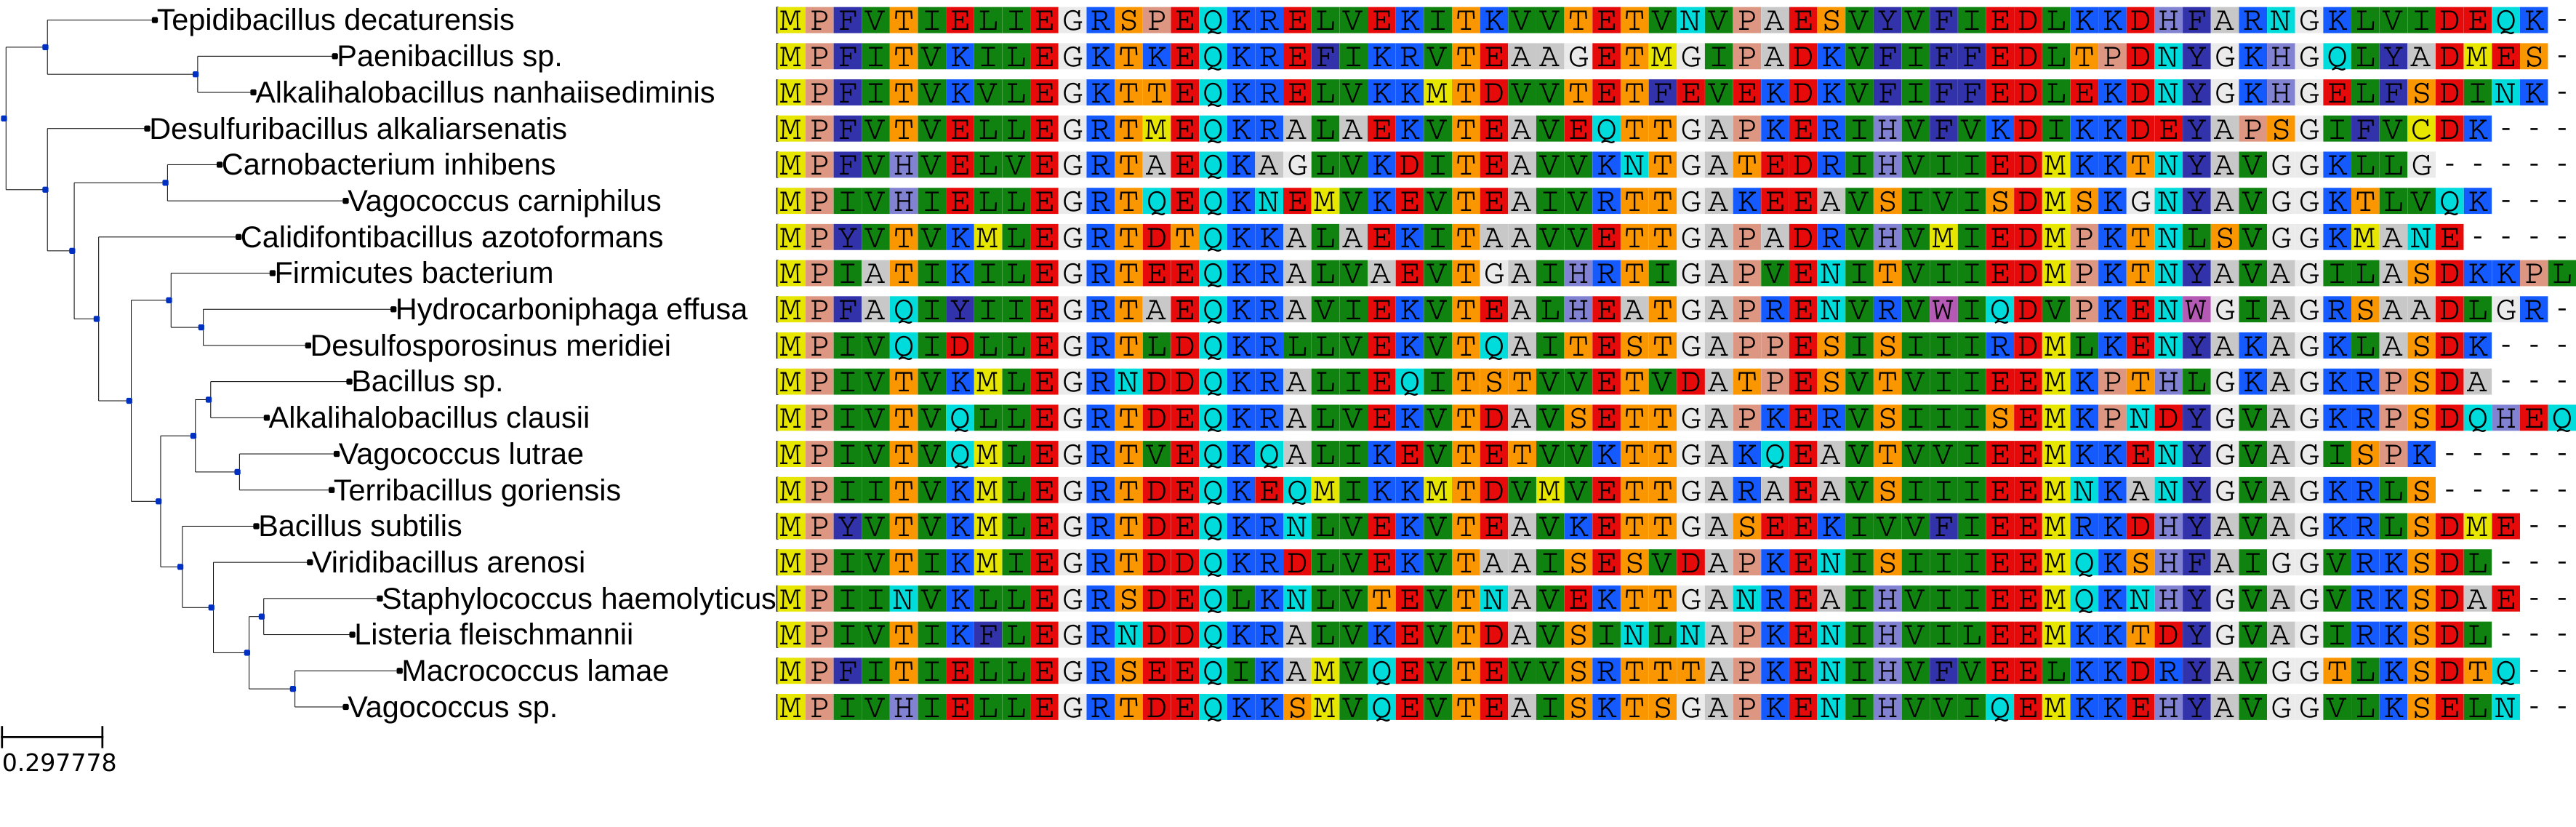

In [32]:
for n in t2.get_leaves():
    n.name = ' '.join(n.sci_name.split()[:2])

td = t2.render("images/mytree_ts_fasta.png", w=1000, units="mm")
Image('images/mytree_ts_fasta.png')

### Calculating evolutionary distances between nodes

Now that we have some control over how to visualize a phylogenetic tree, we move to calculate distances between nodes; this is a quantitative metric of how distant are two nodes (i.e., sequences) in our tree. Let's use two nodes to see how these calculations are carried out:

In [33]:
# Locate some nodes
A = t.search_nodes(name="A0A135L6Q7")[0]
B = t.search_nodes(name="A0A433XHH6")[0]
C = t.search_nodes(name="A0A562QMX2")[0]

# # Calculate distance from current node
print("The distance between B and C is",  B.get_distance(C))
print("The distance between C and B is",  C.get_distance(B))
print()

# # Calculate distance from current node
print("The distance between A and B is",  A.get_distance(B))
print("The distance between B and A is",  t.get_distance(A,B))
print()

# Calculate the toplogical distance (number of nodes in between)
print("The number of nodes between A and C is ",
    t.get_distance(A,C, topology_only=True))
print("The number of nodes between C and A is ",
    t.get_distance(C,A, topology_only=True))
print(t)

The distance between B and C is 0.560571
The distance between C and B is 0.560571

The distance between A and B is 1.147801
The distance between B and A is 1.147801

The number of nodes between A and C is  2.0
The number of nodes between C and A is  2.0

      /-A0A135L6Q7
   /-|
  |  |   /-A0A433XHH6
  |   \-|
  |      \-A0A562QMX2
--|
  |   /-A0A1E5G4W6
  |  |
  |  |      /-U5S6W5
   \-|   /-|
     |  |   \-A0A430B1P6
     |  |
      \-|   /-K6BVQ0
        |  |
        |  |      /-A0A5R8QHJ7
        |  |   /-|
         \-|  |  |   /-I7ZFL3
           |  |   \-|
           |  |      \-J7J0V0
           |  |
            \-|         /-A0A553ZU89
              |      /-|
              |     |   \-Q5WB24
              |   /-|
              |  |  |   /-V6Q3X3
              |  |   \-|
               \-|      \-A0A075LPZ2
                 |
                 |   /-P70994
                 |  |
                  \-|   /-W4F440
                    |  |
                     \-|      /-Q4L670
    

We can also compute the farthest node of a specific node (and its distance):

In [34]:
# Calculate the farthest node
for x in (A,B,C):
    farthest, distance = x.get_farthest_node()
    print("The farthest node from node "+x.name+" is",  farthest.name)
    print("They are at a distance of",  distance)
    print()

The farthest node from node A0A135L6Q7 is I7ZFL3
They are at a distance of 1.4956647

The farthest node from node A0A433XHH6 is I7ZFL3
They are at a distance of 2.0179417

The farthest node from node A0A562QMX2 is I7ZFL3
They are at a distance of 1.7760427



Finally, we use these metrics to create a function to derive a similarity matrix based on phylogenetic distances. 

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def getDistanceMatrixFromTree(tree, topological=False):
    
    # Create array of shape NxN
    M = np.zeros((len(tree), len(tree)))
    
    # Double iteration to compare each leaf node to all the others
    for i, node_i in enumerate(tree):
        for j, node_j in enumerate(tree):
            
            # If the same element is being compared then the distance is zero.
            if i == j:
                M[i][j] = 0
                
            # If two different elements are compared their tree distance is calcualated
            if j > i:
                M[i][j] = node_i.get_distance(node_j, topology_only=topological)
                M[j][i] = M[i][j]
                
    return M

We get the tree distance matrix and plot it with matplotlib:

In [37]:
ids = [n.name for n in t]

Text(0, 0.5, 'Sequence index j')

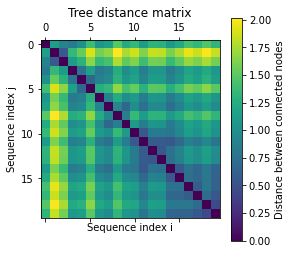

In [38]:
M = getDistanceMatrixFromTree(t)
plt.matshow(M)
cbar = plt.colorbar()
cbar.set_label('Distance between connected nodes')
plt.title('Tree distance matrix')
plt.xlabel('Sequence index i')
plt.ylabel('Sequence index j')

We also show the topological distance matrix:

Text(0, 0.5, 'Sequence index j')

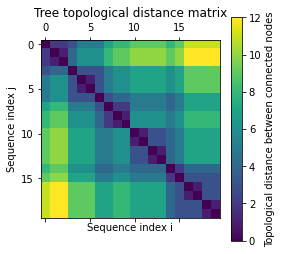

In [39]:
M = getDistanceMatrixFromTree(t, topological=True)
plt.matshow(M)
cbar = plt.colorbar()
cbar.set_label('Topological distance between connected nodes')
plt.title('Tree topological distance matrix')
plt.xlabel('Sequence index i')
plt.ylabel('Sequence index j')

### Wrapping up

In this fourth practice session, we learned:

- How to generate a phylogenetic tree from a fasta file of sequences
- How to load and access the tree information in Python using the ETE library
- How to display the tree with different visualization options
- How to incorporate the MSA display together with our tree
- How to access the complete phylogenetic information of our sequences using the NCBI taxonomic database
- How we can calculate evolutionary distances between the nodes of our tree